<a href="https://colab.research.google.com/github/Rwolste/DS-3001-Assignments/blob/main/LinearModelsAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Q2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean data
df = pd.read_csv("Q1_clean.csv")
df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['Price', 'Neighbourhood', 'Review Scores Rating', 'Property Type'], inplace=True)
df['LogPrice'] = np.log(df['Price'])

Average Price and Rating by Neighbourhood:
                     Price  Review Scores Rating
Neighbourhood                                  
Bronx           75.276498             91.654378
Brooklyn       127.747378             92.363497
Manhattan      183.664286             91.801496
Queens          96.857233             91.549057
Staten Island  146.166667             90.843750


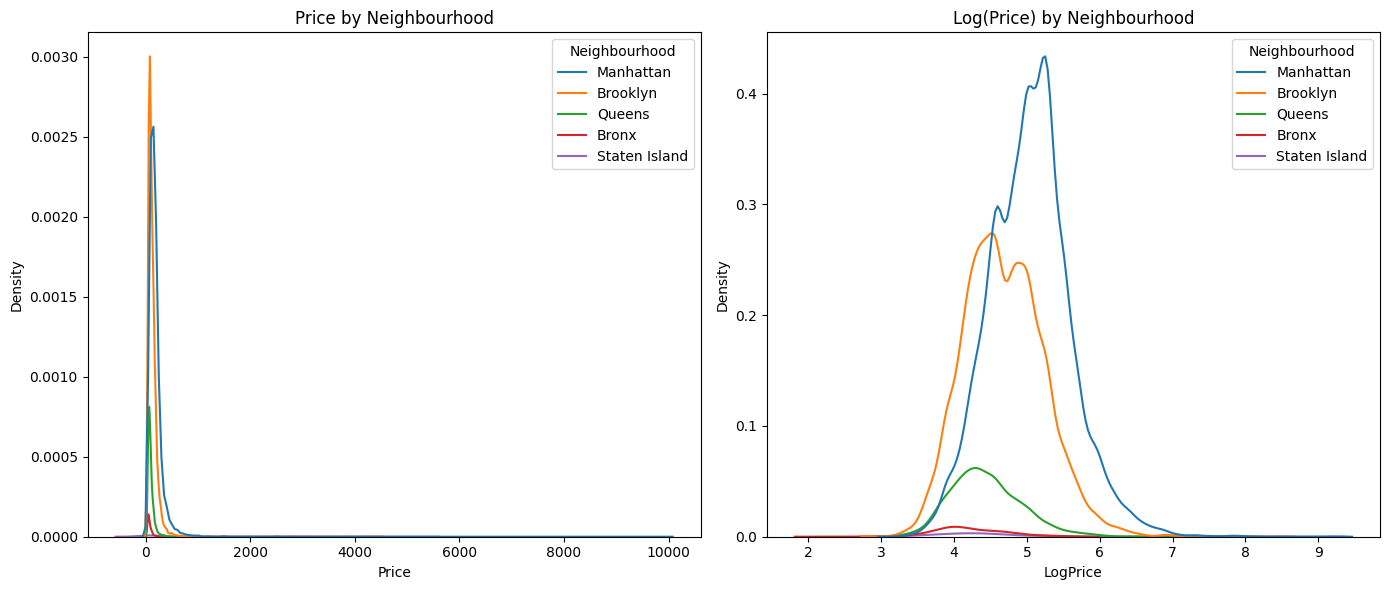

In [3]:
#1


# Average prices and scores by Neighbourhood
avg_by_neigh = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean()
print("Average Price and Rating by Neighbourhood:\n", avg_by_neigh)

# KDE Plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Price', hue='Neighbourhood')
plt.title('Price by Neighbourhood')
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='LogPrice', hue='Neighbourhood')
plt.title('Log(Price) by Neighbourhood')
plt.tight_layout()
plt.show()

In [4]:
#2

X2 = pd.get_dummies(df['Neighbourhood'], drop_first=False)
y2 = df['Price']
model2 = sm.OLS(y2, X2).fit()
print("Q2 Coefficients (No Intercept):\n", model2.params)

Q2 Coefficients (No Intercept):
 Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
dtype: float64


In [5]:
#3

X3 = pd.get_dummies(df['Neighbourhood'], drop_first=True)
X3 = sm.add_constant(X3).astype(float)
y3 = df['Price'].astype(float)
model3 = sm.OLS(y3, X3).fit()
print("Q3 Coefficients (With Intercept):\n", model3.params)

Q3 Coefficients (With Intercept):
 const             75.276498
Brooklyn          52.470881
Manhattan        108.387789
Queens            21.580735
Staten Island     70.890169
dtype: float64


In [18]:
#4
X4 = df[['Review Scores Rating']].join(pd.get_dummies(df['Neighbourhood'], drop_first=True))
y4 = df['Price']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=1)
model4 = LinearRegression().fit(X4_train, y4_train)
y4_pred = model4.predict(X4_test)
print("Q4 R²:", r2_score(y4_test, y4_pred))
print("Q4 RMSE:", mean_squared_error(y4_test, y4_pred))
print("Q4 Coefficient on Review Score:", model4.coef_[0])

Q4 R²: 0.029998487885614766
Q4 RMSE: 42245.69540136627
Q4 Coefficient on Review Score: 1.0517877696820435


In [20]:
#5

X5 = df[['Review Scores Rating']]
X5 = X5.join(pd.get_dummies(df['Neighbourhood'], drop_first=True))
X5 = X5.join(pd.get_dummies(df['Property Type'], drop_first=True))
y5 = df['Price']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=1)
model5 = LinearRegression().fit(X5_train, y5_train)
y5_pred = model5.predict(X5_test)
print("Q5 R²:", r2_score(y5_test, y5_pred))
print("Q5 RMSE:", mean_squared_error(y5_test, y5_pred))
print("Q5 Coefficient on Review Score:", model5.coef_[0])

Q5 R²: 0.03813988400894919
Q5 RMSE: 41891.11972651135
Q5 Coefficient on Review Score: 1.0493652221871215


In [21]:
#6

delta = model5.coef_[0] - model4.coef_[0]
print("Q6: Change in Review Score Coefficient from Q4 to Q5:", delta)

Q6: Change in Review Score Coefficient from Q4 to Q5: -0.0024225474949219894


In [22]:
#Q3

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
#1

df = pd.read_csv("cars_hw.csv")

# Drop unnecessary index column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'No_of_Owners' from string ('1st', '2nd') to numeric
df['No_of_Owners'] = df['No_of_Owners'].str.extract('(\d)').astype(float)

# Add log-transformed versions of skewed numeric variables
df['Log_Price'] = np.log1p(df['Price'])          # log(Price + 1)
df['Log_Mileage'] = np.log1p(df['Mileage_Run'])  # log(Mileage + 1)

Summary of Price:
 count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64


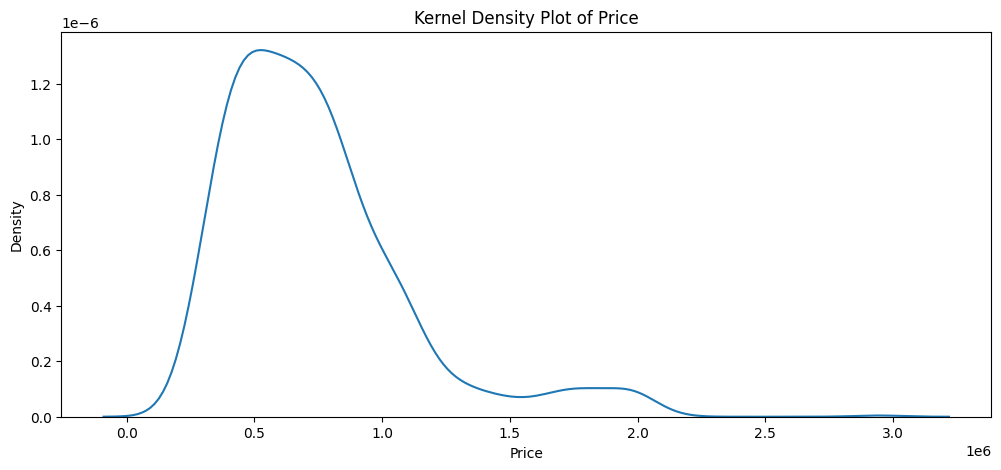


Price Summary by Make:
                count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault      

<ipython-input-24-e2ade0842c18>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Make')


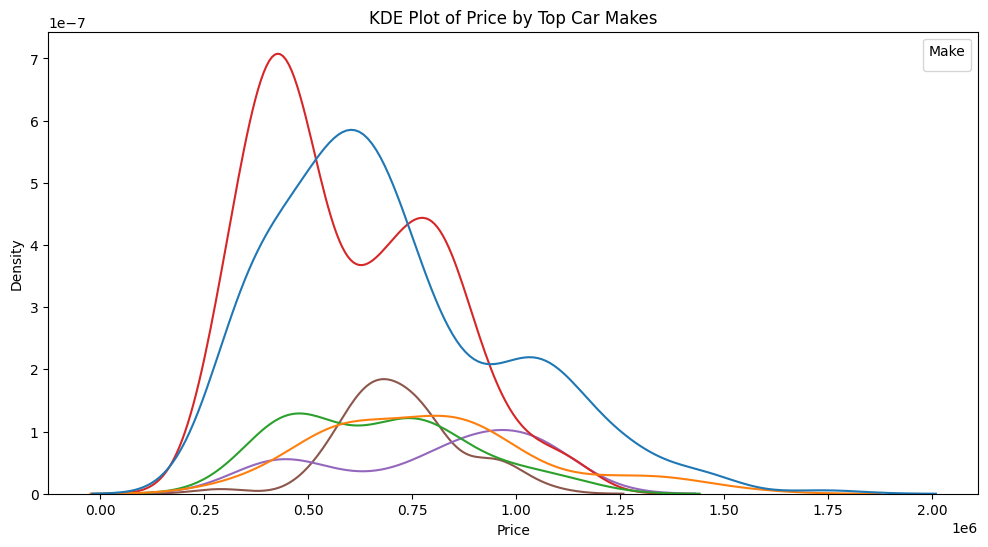

In [24]:
#2

print("Summary of Price:\n", df['Price'].describe())

# Kernel Density Plot of Price
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df, x='Price')
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Price summary grouped by Make
print("\nPrice Summary by Make:\n", df.groupby('Make')['Price'].describe())

# KDE Plot by Make (top 6 car brands by frequency)
top_makes = df['Make'].value_counts().nlargest(6).index
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Make'].isin(top_makes)], x='Price', hue='Make')
plt.title('KDE Plot of Price by Top Car Makes')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Make')
plt.show()

# Most car prices in the dataset range between ₹400,000 and ₹900,000, with a right-skewed
# distribution and a median price of ₹666,500. The most expensive brands on average are MG Motors,
# Kia, and Jeep, each with average prices well above ₹1.4 million. These luxury and SUV-focused
# brands significantly raise the overall price range compared to more common brands like Maruti
# Suzuki or Hyundai.

In [25]:
#3

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

y_train = train_df['Price']
y_test = test_df['Price']

In [31]:
#4

from sklearn.metrics import r2_score, root_mean_squared_error
# ===== 3. Model A: Numeric variables only =====
X_train_a = train_df[num_features]
X_test_a = test_df[num_features]

model_a = LinearRegression().fit(X_train_a, y_train)
pred_train_a = model_a.predict(X_train_a)
pred_test_a = model_a.predict(X_test_a)

r2_train_a = r2_score(y_train, pred_train_a)
r2_test_a = r2_score(y_test, pred_test_a)
rmse_test_a = root_mean_squared_error(y_test, pred_test_a)

# ===== 4. Model B: Categorical variables only =====
X_train_b = pd.get_dummies(train_df[cat_features], drop_first=True)
X_test_b = pd.get_dummies(test_df[cat_features], drop_first=True)
X_test_b = X_test_b.reindex(columns=X_train_b.columns, fill_value=0)

model_b = LinearRegression().fit(X_train_b, y_train)
pred_test_b = model_b.predict(X_test_b)

r2_test_b = r2_score(y_test, pred_test_b)
rmse_test_b = root_mean_squared_error(y_test, pred_test_b)


# ===== 5. Model C: Combined numeric + categorical =====
X_train_c = pd.concat([X_train_a.reset_index(drop=True), X_train_b.reset_index(drop=True)], axis=1)
X_test_c = pd.concat([X_test_a.reset_index(drop=True), X_test_b.reset_index(drop=True)], axis=1)

model_c = LinearRegression().fit(X_train_c, y_train)
pred_test_c = model_c.predict(X_test_c)

r2_test_c = r2_score(y_test, pred_test_c)
rmse_test_c = root_mean_squared_error(y_test, pred_test_c)

# ===== 6. Output Results =====
print("Model A – Numeric Only")
print("  R² (Train):", round(r2_train_a, 3))
print("  R² (Test):", round(r2_test_a, 3))
print("  RMSE (Test):", round(rmse_test_a))

print("\nModel B – Categorical Only")
print("  R² (Test):", round(r2_test_b, 3))
print("  RMSE (Test):", round(rmse_test_b))

print("\nModel C – Combined")
print("  R² (Test):", round(r2_test_c, 3))
print("  RMSE (Test):", round(rmse_test_c))

# ===== 7. Improvement Summary =====
print("\nImprovement from Model B to C:")
print("  R² Increase:", round(r2_test_c - r2_test_b, 3))
print("  RMSE Decrease:", round(rmse_test_b - rmse_test_c))

# Model A (Numeric-only) used features like mileage, seating capacity, and car age.
# It had a test R² of ~0.29 and an RMSE of ₹284,941, meaning it explained only a small portion
# of price variation. Model B (Categorical-only) used one-hot-encoded features like make, body type,
# and fuel type. It performed much better, with a test R² of ~0.66 and RMSE of ₹198,821. Model C
# (Combined) used both numeric and categorical features. This was the best model, with a test R² of
# ~0.79 and an RMSE of ₹155,703. The combined model performs significantly better than either alone,
# improving R² by +13 percentage points and reducing RMSE by ₹43,000 compared to Model B.

Model A – Numeric Only
  R² (Train): 0.316
  R² (Test): 0.292
  RMSE (Test): 284941

Model B – Categorical Only
  R² (Test): 0.655
  RMSE (Test): 198821

Model C – Combined
  R² (Test): 0.789
  RMSE (Test): 155703

Improvement from Model B to C:
  R² Increase: 0.133
  RMSE Decrease: 43118


In [30]:
#5
cat_features = ['Color','Body_Type','Make','Fuel_Type','Transmission_Type']
num_features = ['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'No_of_Owners']
X_train_num = train_df[num_features]
X_test_num = test_df[num_features]
y_train = train_df['Price']
y_test = test_df['Price']

# Store results for each polynomial degree
poly_results = []
best_r2 = -float('inf')
best_rmse = None
best_degree = None

for degree in range(1, 6):
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_num)
    X_test_poly = poly.transform(X_test_num)

    # Fit and evaluate the model
    model_poly = LinearRegression().fit(X_train_poly, y_train)
    pred_test_poly = model_poly.predict(X_test_poly)
    r2 = r2_score(y_test, pred_test_poly)
    rmse = root_mean_squared_error(y_test, pred_test_poly)

    poly_results.append((degree, r2, rmse))

     # Track best model
    if r2 > best_r2:
        best_r2 = r2
        best_rmse = rmse
        best_degree = degree

# Display results
for degree, r2, rmse in poly_results:
    print(f"Degree {degree}: R² = {round(r2, 3)}, RMSE = {round(rmse)}")

print("\nBest model: Degree", best_degree)
print("Best R²:", round(best_r2, 3))
print("Best RMSE:", round(best_rmse))

# As the degree of polynomial expansion increases, the test R² improves slightly at first but then
# starts to decline due to overfitting, while the RMSE initially decreases and then rises. The best
# performance occurred at degree 2, with an R² of ~0.33 and RMSE of ~₹277,108. Starting at degree 4,
# the test R² became negative, indicating the model was fitting the training data too closely and
# generalizing poorly. Even at its best, the polynomial model was significantly worse than the
# combined model from part 4, which had an R² of ~0.79 and RMSE of ~₹155,703.

Degree 1: R² = 0.292, RMSE = 284941
Degree 2: R² = 0.33, RMSE = 277108
Degree 3: R² = 0.313, RMSE = 280728
Degree 4: R² = 0.311, RMSE = 281176
Degree 5: R² = 0.288, RMSE = 285733

Best model: Degree 2
Best R²: 0.33
Best RMSE: 277108


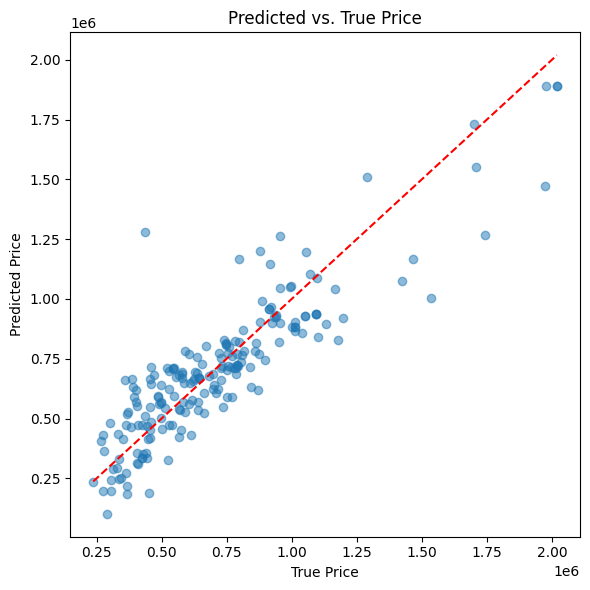

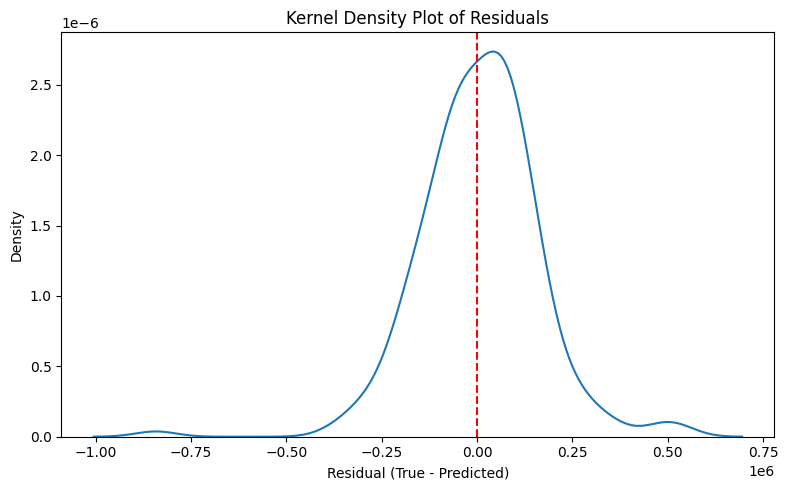

In [32]:
#6

y_pred = model_c.predict(X_test_c)


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.title('Predicted vs. True Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.kdeplot(residuals)
plt.axvline(0, color='red', linestyle='--')
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residual (True - Predicted)')
plt.tight_layout()
plt.show()

# Yes, the predicted values and true values mostly line up along the diagonal, indicating that the
# model is generally accurate in estimating car prices. The residuals (errors) form a roughly
# bell-shaped distribution centered around zero in the kernel density plot, which suggests that the
# model's errors are balanced and normally distributed. Strengths of the model include its ability
# to capture both brand/type effects and numeric trends like mileage and year. However, a weakness
# is that it slightly underestimates prices for high-end cars, indicating room for improvement with
# nonlinear features or interaction terms.